In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

# Use seaborn's own theme settings instead of matplotlib's style
sns.set_theme()

# Your plotting code


In [2]:
df_bank = pd.read_csv("deposit term dirty null.csv")
df_bank.head()

,Id,BankId,Year,first_name,last_name,email,age,job,marital,education,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,8267790704,2023,Paul,Casey,paul.casey.1@gslingacademy.com,999.0,management,married,tertiary,...,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,1002,6712420122,2023,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,44.0,technician,single,secondary,...,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,1003,7184524312,2023,Tina,Andrews,tina.andrews.3@gslingacademy.com,33.0,entrepreneur,married,secondary,...,yes,unknown,5,may,76.0,1,NaN,0,unknown,no
3,1004,2955004551,2023,Tara,Clark,tara.clark.4@gslingacademy.com,47.0,blue-collar,married,unknown,...,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,1005,9657974076,2023,Anthony,Campos,anthony.campos.5@gslingacademy.com,33.0,unknown,single,unknown,...,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [3]:
# List of columns to check
columns_to_check = ['age', 'job','marital',	'education','default','balance','housing','loan','contact',	'day','month', 'duration','campaign','pdays','previous',	
                    'poutcome']

# Loop through each column and apply type checking
for column in columns_to_check:
    print(f"Data types in column '{column}':")
    print(df_bank[column].apply(type).value_counts())
    print("-" * 40)  # Separator for better readability


Data types in column 'age':
age
<class 'float'>    45211
Name: count, dtype: int64
----------------------------------------
Data types in column 'job':
job
<class 'str'>      45203
<class 'float'>        8
Name: count, dtype: int64
----------------------------------------
Data types in column 'marital':
marital
<class 'str'>    45211
Name: count, dtype: int64
----------------------------------------
Data types in column 'education':
education
<class 'str'>    45211
Name: count, dtype: int64
----------------------------------------
Data types in column 'default':
default
<class 'str'>      45206
<class 'float'>        5
Name: count, dtype: int64
----------------------------------------
Data types in column 'balance':
balance
<class 'float'>    45211
Name: count, dtype: int64
----------------------------------------
Data types in column 'housing':
housing
<class 'str'>      45204
<class 'float'>        7
Name: count, dtype: int64
----------------------------------------
Data types in col

In [4]:

df_bank = df_bank.drop(['Id', 'BankId', 'Year', 'first_name', 'last_name', 'email'], axis=1, errors='ignore')
df_bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,NaN,yes,unknown,5,may,76.0,1,NaN,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [5]:
# To check duplicated values 
print(df_bank.duplicated().value_counts()) 
print(df_bank.duplicated().sum())

False    45211
Name: count, dtype: int64
0


In [6]:
# Remove duplicated rows
df_bank_cleaned = df_bank.drop_duplicates()

# Verify if duplicates are removed
print(df_bank_cleaned.duplicated().sum())  # This should return 0 if all duplicates are removed


0


In [7]:
# We need to check missing values in dataset
df_bank.isnull().sum()

age          10
job           8
marital       0
education     0
default       5
balance       3
housing       7
loan          0
contact      13
day           0
month         1
duration     47
campaign      0
pdays         4
previous      0
poutcome      0
y             0
dtype: int64

In [8]:
df_bank.dropna(subset=['housing', 'default',  'month', 'contact', 'job'], inplace=True)

In [9]:
df_bank['duration'] = pd.to_numeric(df_bank['duration'], errors='coerce')
print(df_bank)

         age           job   marital  education default  balance housing loan  \
0      999.0    management   married   tertiary      no   2143.0     yes   no   
1       44.0    technician    single  secondary      no     29.0     yes   no   
3       47.0   blue-collar   married    unknown      no   1506.0     yes   no   
4       33.0       unknown    single    unknown      no      1.0      no   no   
10      41.0        admin.  divorced  secondary      no    270.0     yes   no   
...      ...           ...       ...        ...     ...      ...     ...  ...   
45206   51.0    technician   married   tertiary      no    825.0      no   no   
45207   71.0       retired  divorced    primary      no   1729.0      no   no   
45208   72.0       retired   married  secondary      no   5715.0      no   no   
45209   57.0   blue-collar   married  secondary      no    668.0      no   no   
45210   37.0  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month

In [10]:
df_bank['age'] = df_bank['age'].fillna(df_bank['age'].median())    # Filing the null values with median
df_bank['balance'] = df_bank['balance'].fillna(df_bank['balance'].median()) # Filing the null values with median
df_bank['duration'] = df_bank['duration'].fillna(df_bank['duration'].median()) # Filing the null values with median
df_bank['pdays'] = df_bank['pdays'].fillna(df_bank['pdays'].median()) # Filing the null values with median



In [11]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df_bank.shape

(45178, 17)

In [13]:
# Select only numeric columns
numeric_cols = df_bank.select_dtypes(include=[np.number]).columns

# Loop through the numeric columns and check for negative values
for col in numeric_cols:
    negative_values = df_bank[df_bank[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column {col}:")
        print(negative_values[[col]], "\n")


Negative values found in column age:
       age
45203 -1.0
45204 -1.0
45205 -1.0 

Negative values found in column balance:
       balance
25      -372.0
28      -246.0
36        -7.0
37        -3.0
45      -171.0
...        ...
44626   -205.0
44629    -46.0
44836   -195.0
44908   -130.0
44964    -42.0

[3765 rows x 1 columns] 

Negative values found in column pdays:
       pdays
0       -1.0
1       -1.0
3       -1.0
4       -1.0
10      -1.0
...      ...
45203   -1.0
45205   -1.0
45206   -1.0
45207   -1.0
45209   -1.0

[36921 rows x 1 columns] 



In [14]:
mean_balance = df_bank[df_bank['balance'] >= 0]['balance'].mean()
df_bank['balance'] = df_bank['balance'].apply(lambda x: mean_balance if x < 0 else x)


In [15]:
#checking for outliers in categorical variables
# Check unique values for each categorical column
for job in df_bank.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values in {job}:")
    print(df_bank[job].unique(), "\n")


Unique values in job:
['management' 'technician' 'blue-collar' 'unknown' 'admin.' 'retired'
 'services' 'entrepreneur' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

Unique values in marital:
['married' 'single' 'divorced'] 

Unique values in education:
['tertiary' 'secondary' 'unknown' 'primary'] 

Unique values in default:
['no' 'yes'] 

Unique values in housing:
['yes' 'no'] 

Unique values in loan:
['no' 'yes'] 

Unique values in contact:
['unknown' 'cellular' 'telephone'] 

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

Unique values in poutcome:
['unknown' 'failure' 'other' 'success'] 

Unique values in y:
['no' 'yes'] 



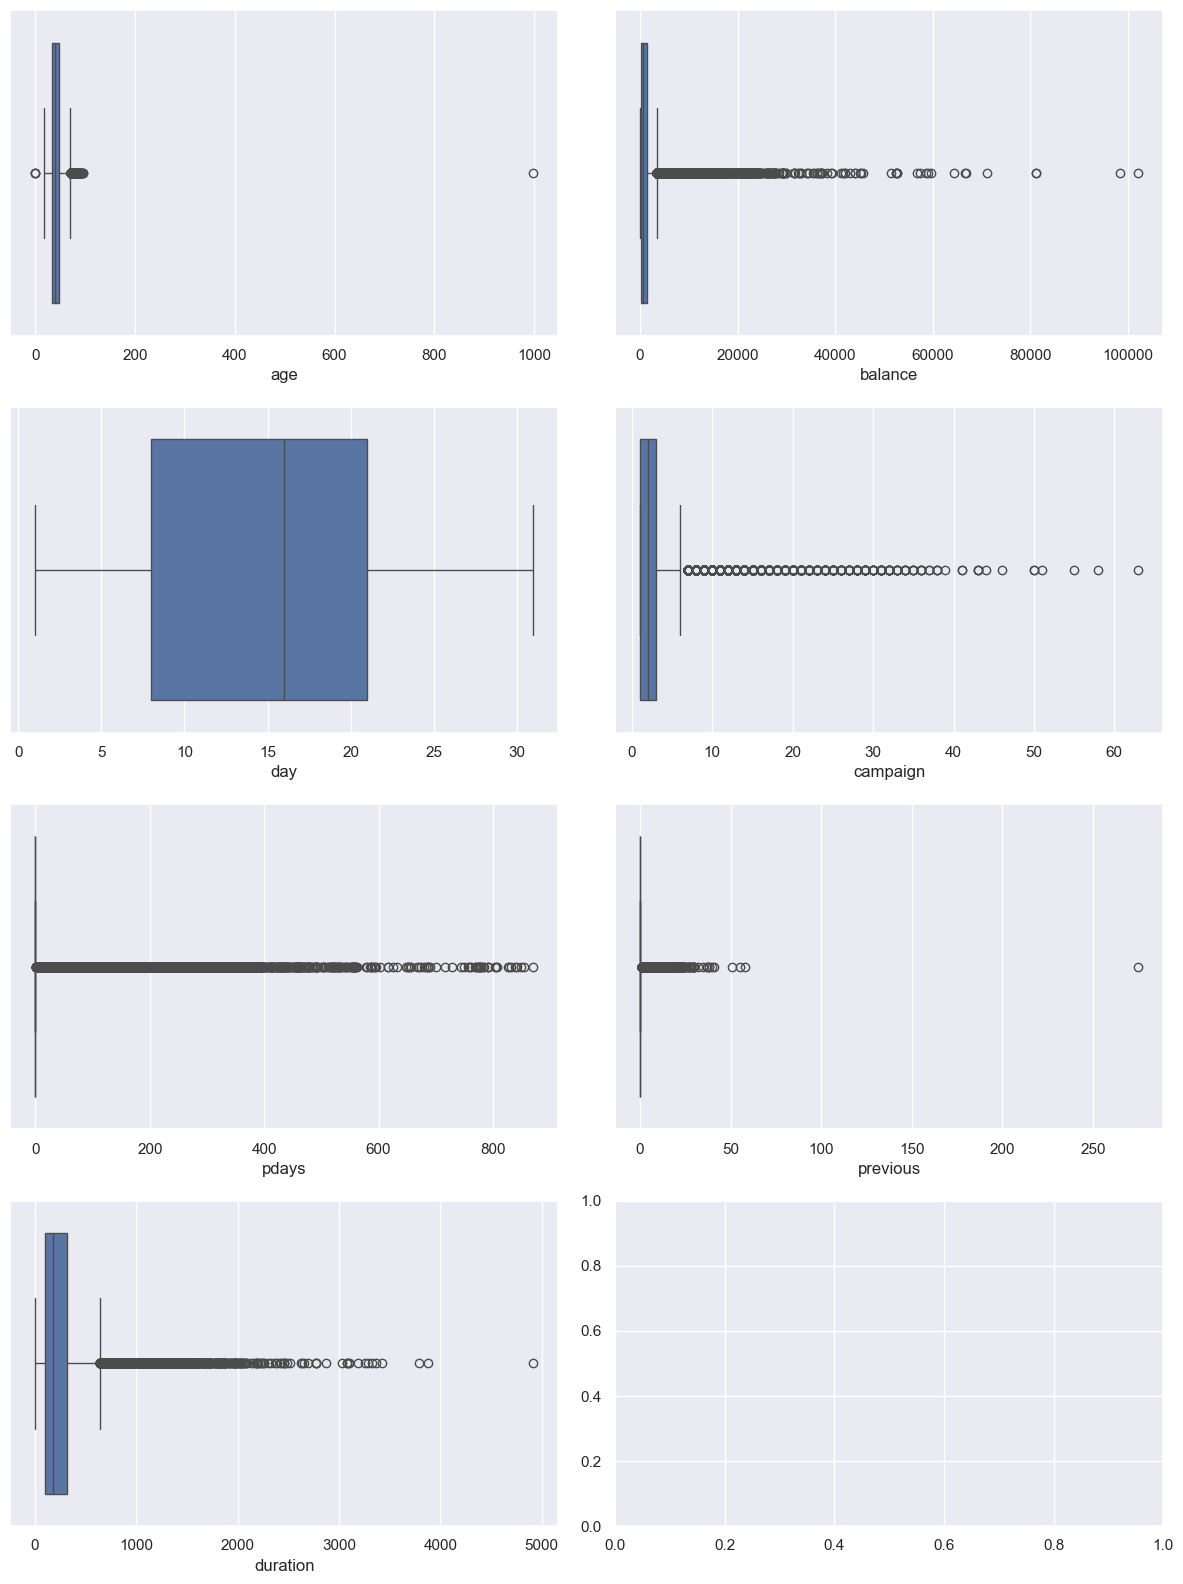

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # 4 rows, 2 columns


# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.boxplot(data=df_bank, x='pdays', ax=axes[2, 0])
sns.boxplot(data=df_bank, x='previous', ax=axes[2, 1])
sns.boxplot(data=df_bank, x='duration', ax=axes[3, 0])  # Adjust to [2, 1] for third row, second column



# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
def cap_outliers(df_bank, column):
    Q1 = df_bank[column].quantile(0.25)
    Q3 = df_bank[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_bank[column] = df_bank[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df_bank

# Example usage
df_bank = cap_outliers(df_bank, 'age')
df_bank = cap_outliers(df_bank, 'balance')
df_bank = cap_outliers(df_bank, 'day')
df_bank = cap_outliers(df_bank, 'campaign')
df_bank = cap_outliers(df_bank, 'duration')
df_bank = cap_outliers(df_bank, 'pdays')
df_bank = cap_outliers(df_bank, 'previous')
# Repeat for other columns as needed


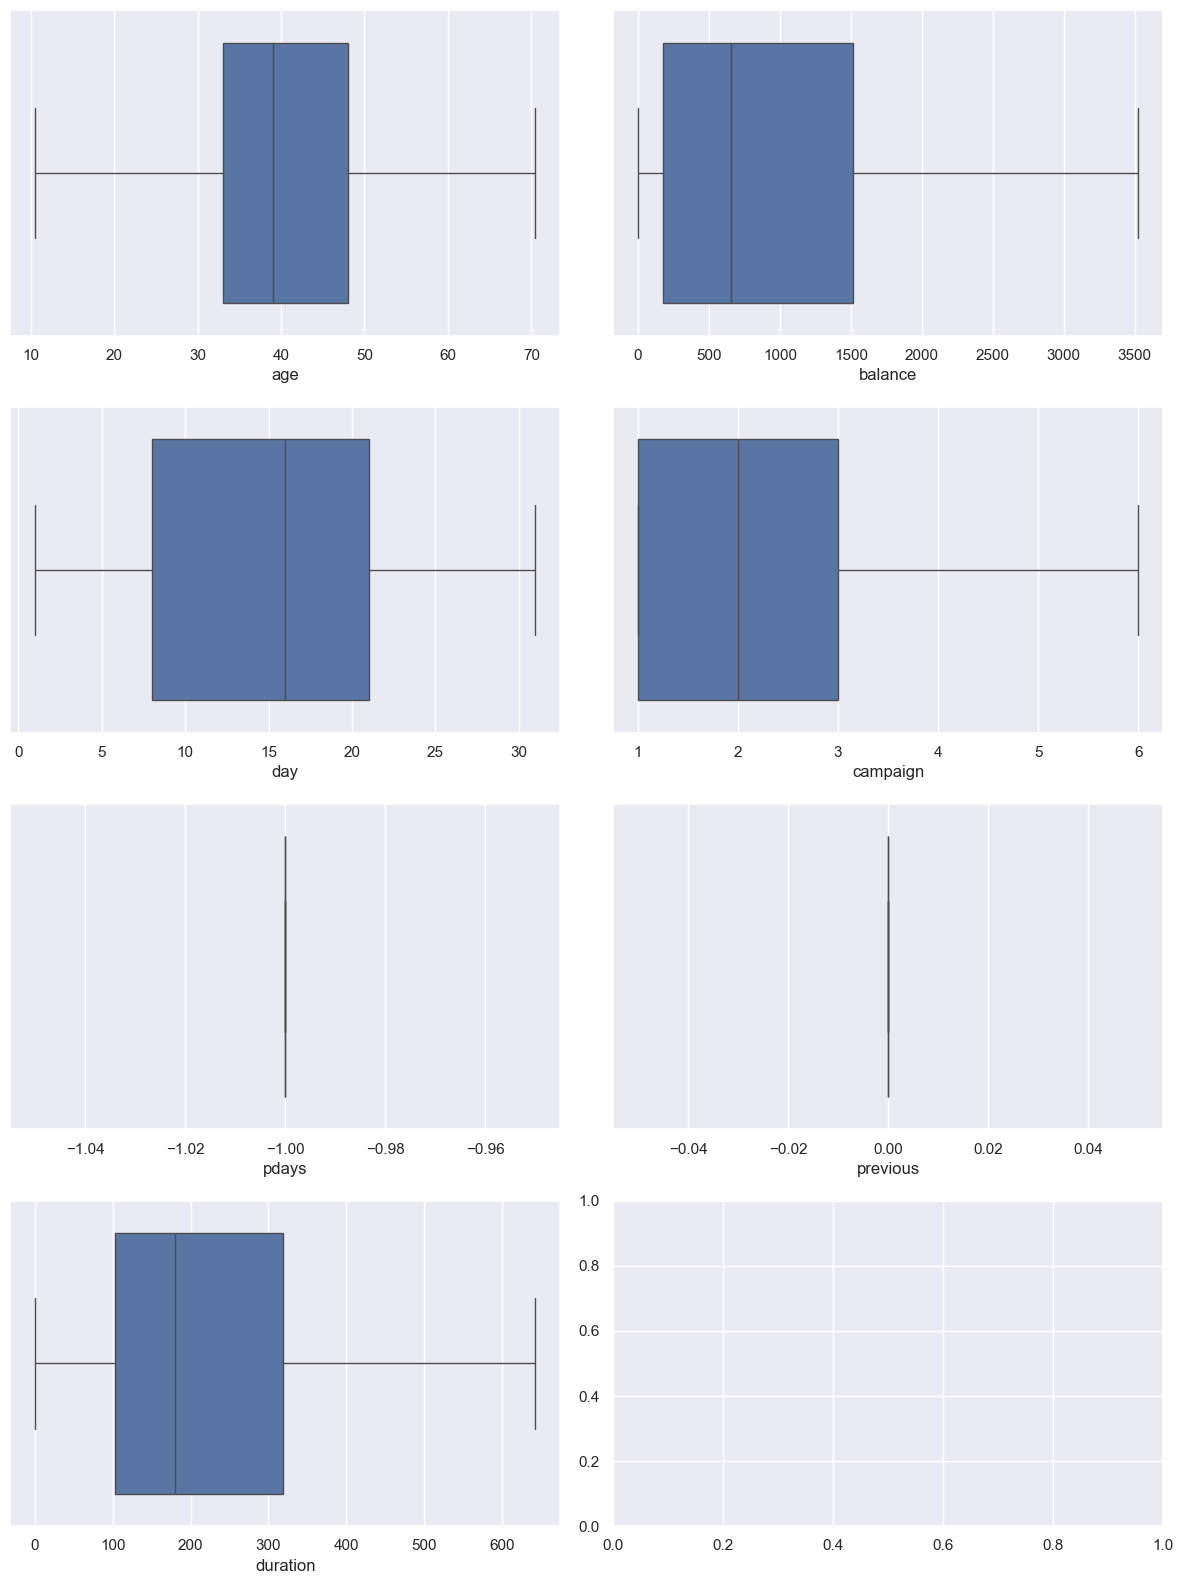

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # 4 rows, 2 columns


# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.boxplot(data=df_bank, x='pdays', ax=axes[2, 0])
sns.boxplot(data=df_bank, x='previous', ax=axes[2, 1])
sns.boxplot(data=df_bank, x='duration', ax=axes[3, 0])  # Adjust to [2, 1] for third row, second column



# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# after applying the outlier capping,
# it show 0 for previous column and -1 for pdays coloum
#it means these columns no longer have much variation, and they could potentially be uninformative for your model or analysis.

In [19]:
df_bank = df_bank.drop(['pdays','previous'], axis=1)
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,70.5,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,unknown,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222.0,1.0,unknown,no


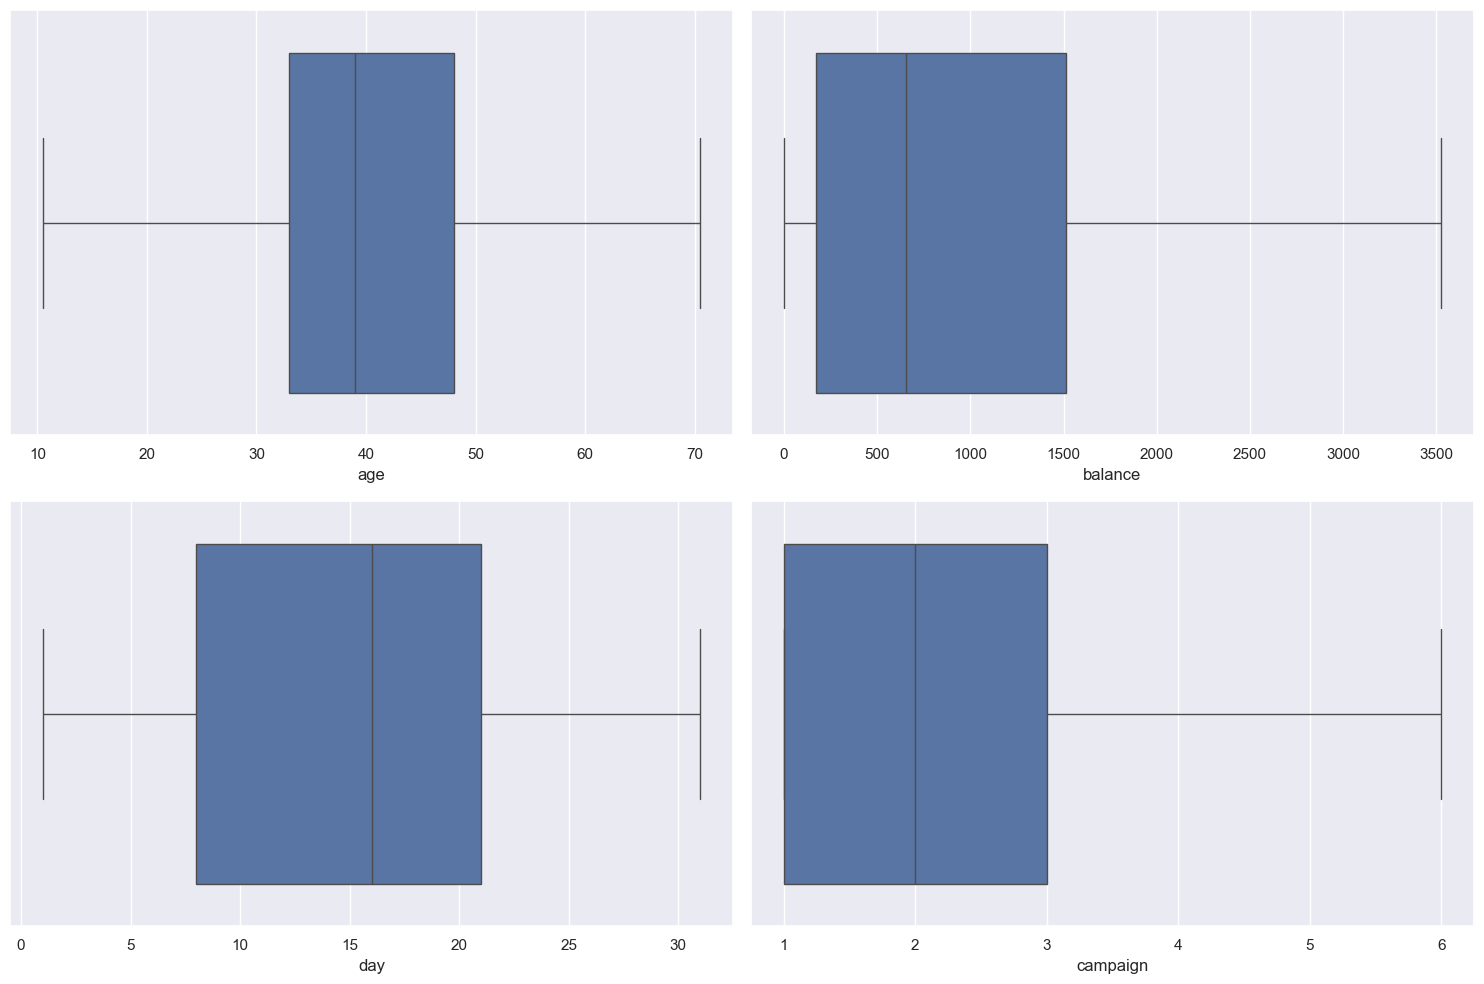

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
df_bank.describe()

,age,balance,day,duration,campaign
count,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000
mean,40.868985,1092.442567,15.809199,234.921134,2.392492
std,10.396929,1132.743901,8.319956,176.702276,1.600147
min,10.500000,0.000000,1.000000,0.000000,1.000000
25%,33.000000,175.000000,8.000000,103.000000,1.000000
50%,39.000000,654.000000,16.000000,180.000000,2.000000
75%,48.000000,1514.990921,21.000000,319.000000,3.000000
max,70.500000,3524.977302,31.000000,643.000000,6.000000


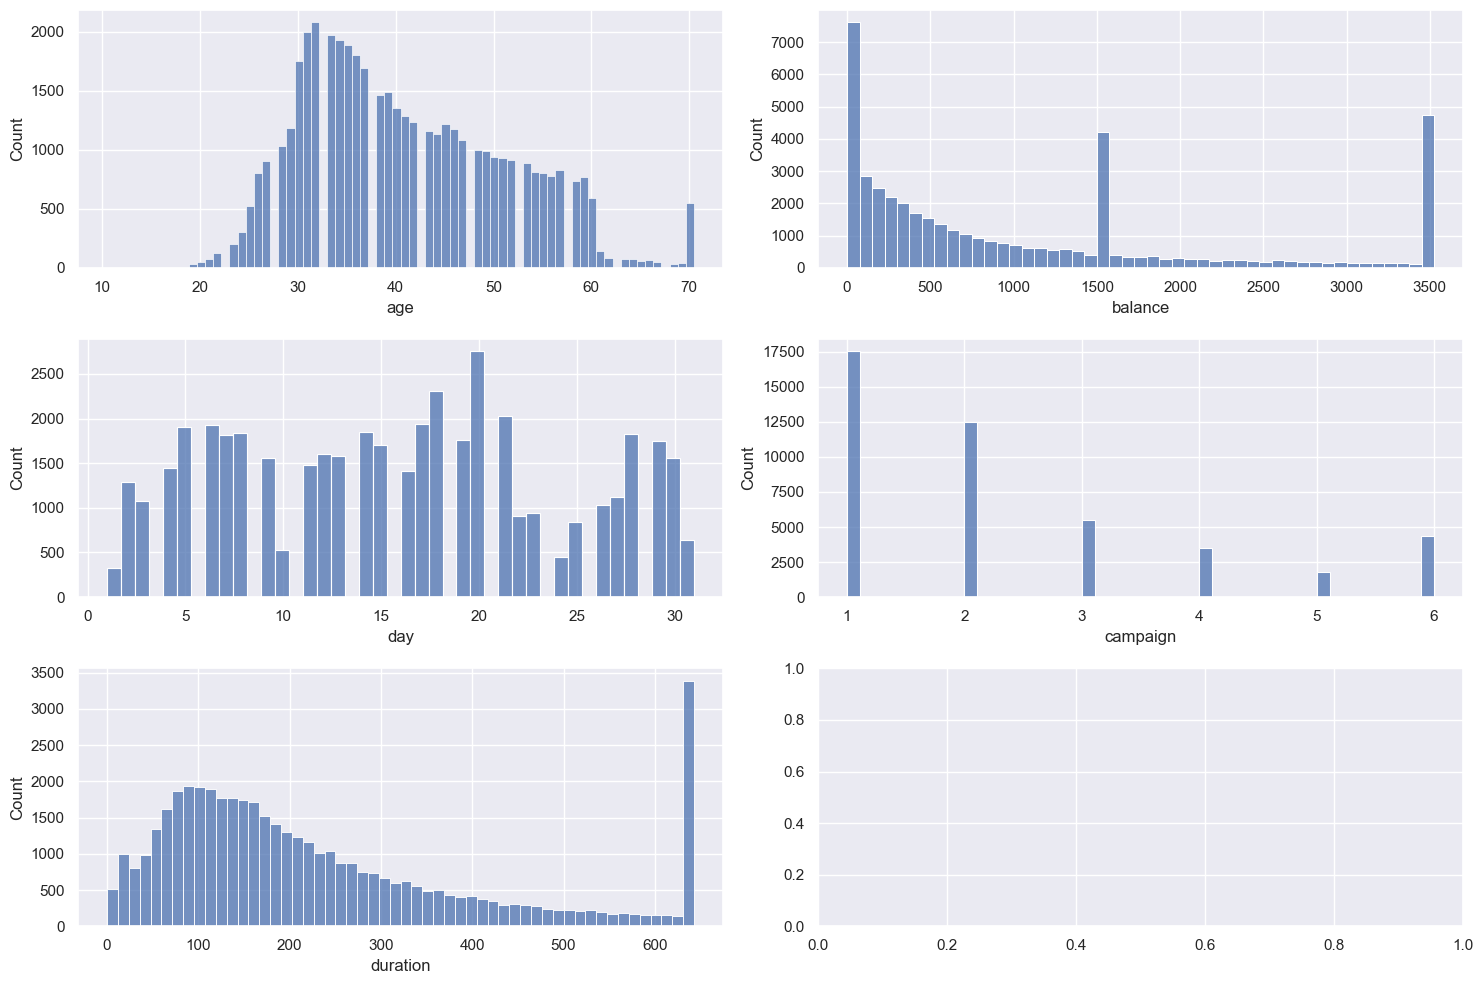

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 3 columns
sns.histplot(data=df_bank, x='age', ax=axes[0, 0])
sns.histplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.histplot(data=df_bank, x='day', ax=axes[1, 0])
sns.histplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.histplot(data=df_bank, x='duration', ax=axes[2,0])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


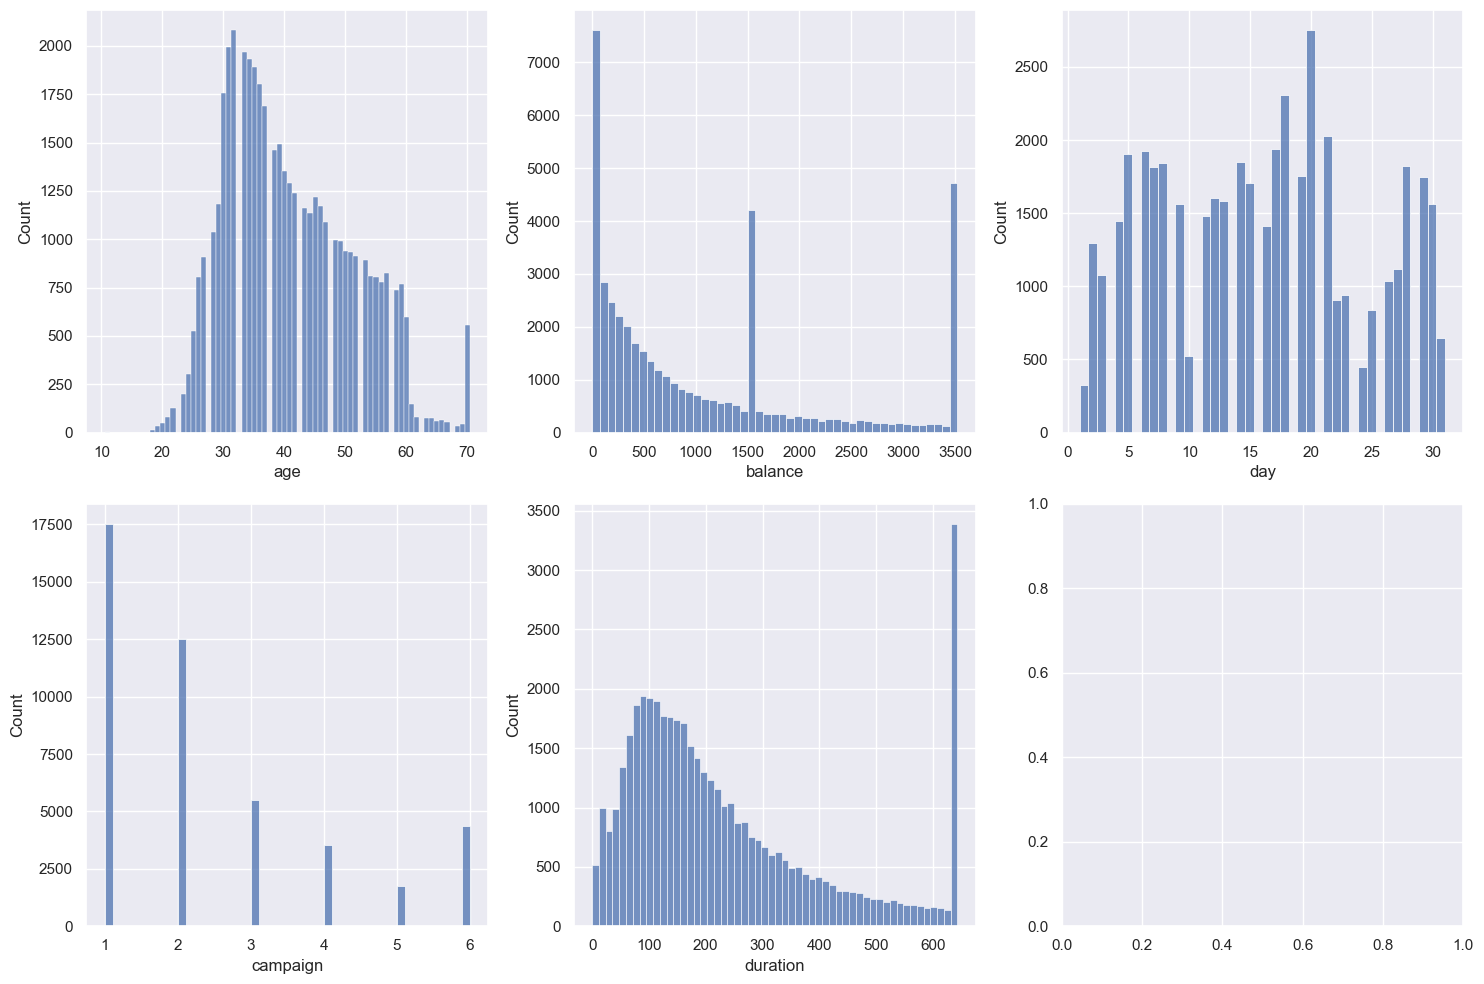

In [22]:
from pylab import *
import seaborn as sns
import numpy as np

# Set figure size and random seed
sns.set(rc={"figure.figsize": (15, 10)})
np.random.seed(0)

# Create a 2x3 grid for 6 subplots
fig, axes = plt.subplots(2, 3)  # 2 rows, 3 columns

# Plotting in an organized manner
sns.histplot(df_bank['age'], ax=axes[0, 0])        # Top-left
sns.histplot(df_bank['balance'], ax=axes[0, 1])    # Top-middle
sns.histplot(df_bank['day'], ax=axes[0, 2])        # Top-right
sns.histplot(df_bank['campaign'], ax=axes[1, 0])   # Bottom-left
sns.histplot(df_bank['duration'], ax=axes[1, 1])   # Bottom-middle
  

# Adjust layout
plt.tight_layout()
plt.show()


y
no     39889
yes     5289
Name: count, dtype: int64


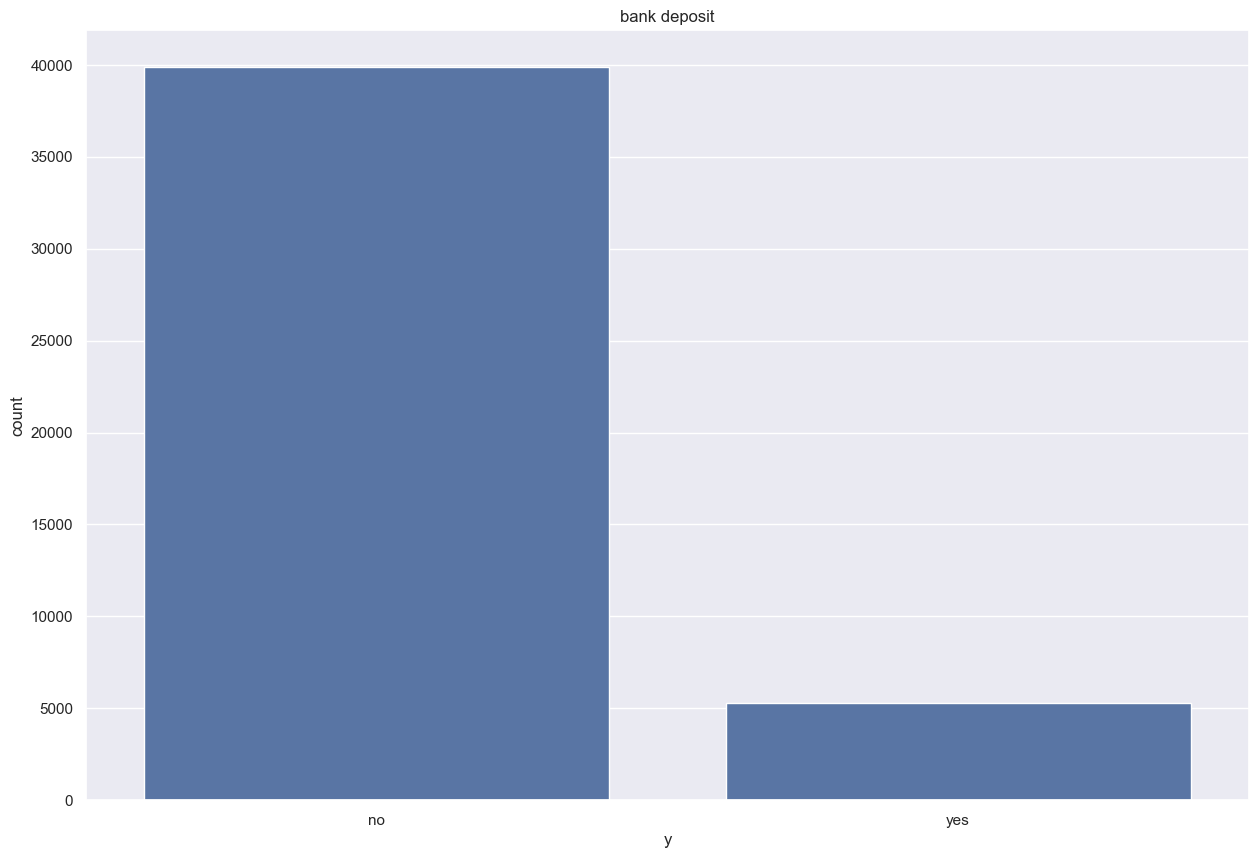

In [23]:
print(df_bank.y.value_counts())
axes1 = sns.countplot(x='y', data = df_bank)
#giving title to the plot
plt.title('bank deposit');

In [24]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [25]:
df_bank.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign     float64
poutcome      object
y             object
dtype: object

In [26]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
y            0
dtype: int64

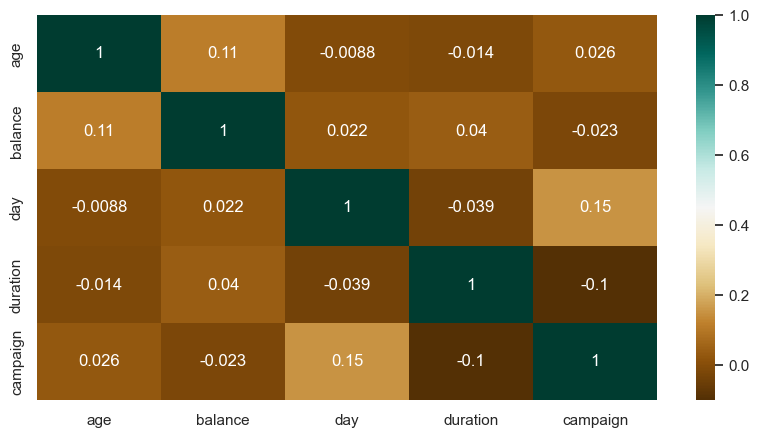

In [27]:
# Filter only numeric columns for the correlation matrix
numeric_df_bank = df_bank.select_dtypes(include=['float64', 'int64'])

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(10,5))
c = numeric_df_bank.corr()  # Correlation of numeric columns only
sns.heatmap(c, cmap="BrBG", annot=True)

plt.show()


In [35]:
###hi


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd



In [29]:
# Feature-target split
X = df_bank.drop('y', axis=1)
y = df_bank['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# 1. Data Standardization and Encoding
def preprocess_data(X, categorical_features, numerical_features):
    # One-hot encoding for categorical features and scaling numerical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )
    return preprocessor


In [31]:
# Example usage of preprocess_data function
categorical_features = [col for col in X.columns if X[col].dtype == 'object']  # Automatically get categorical features
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]  # Automatically get numerical features

# Apply preprocessing
preprocessor = preprocess_data(X, categorical_features, numerical_features)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [33]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Define a function to evaluate the Decision Tree model and print metrics
def evaluate_decision_tree(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train and test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Print classification report
    print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_test))
    
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    
    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary'),
        'Recall': recall_score(y_test, y_pred_test, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }
    
    # Print the evaluation metrics
    #for metric, value in metrics.items():
        #print(f'{metric}: {value}')

    return metrics

# Define a function to plot ROC curve for Decision Tree
def plot_roc_curve_decision_tree(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Decision Tree')
    plt.legend()
    plt.show()


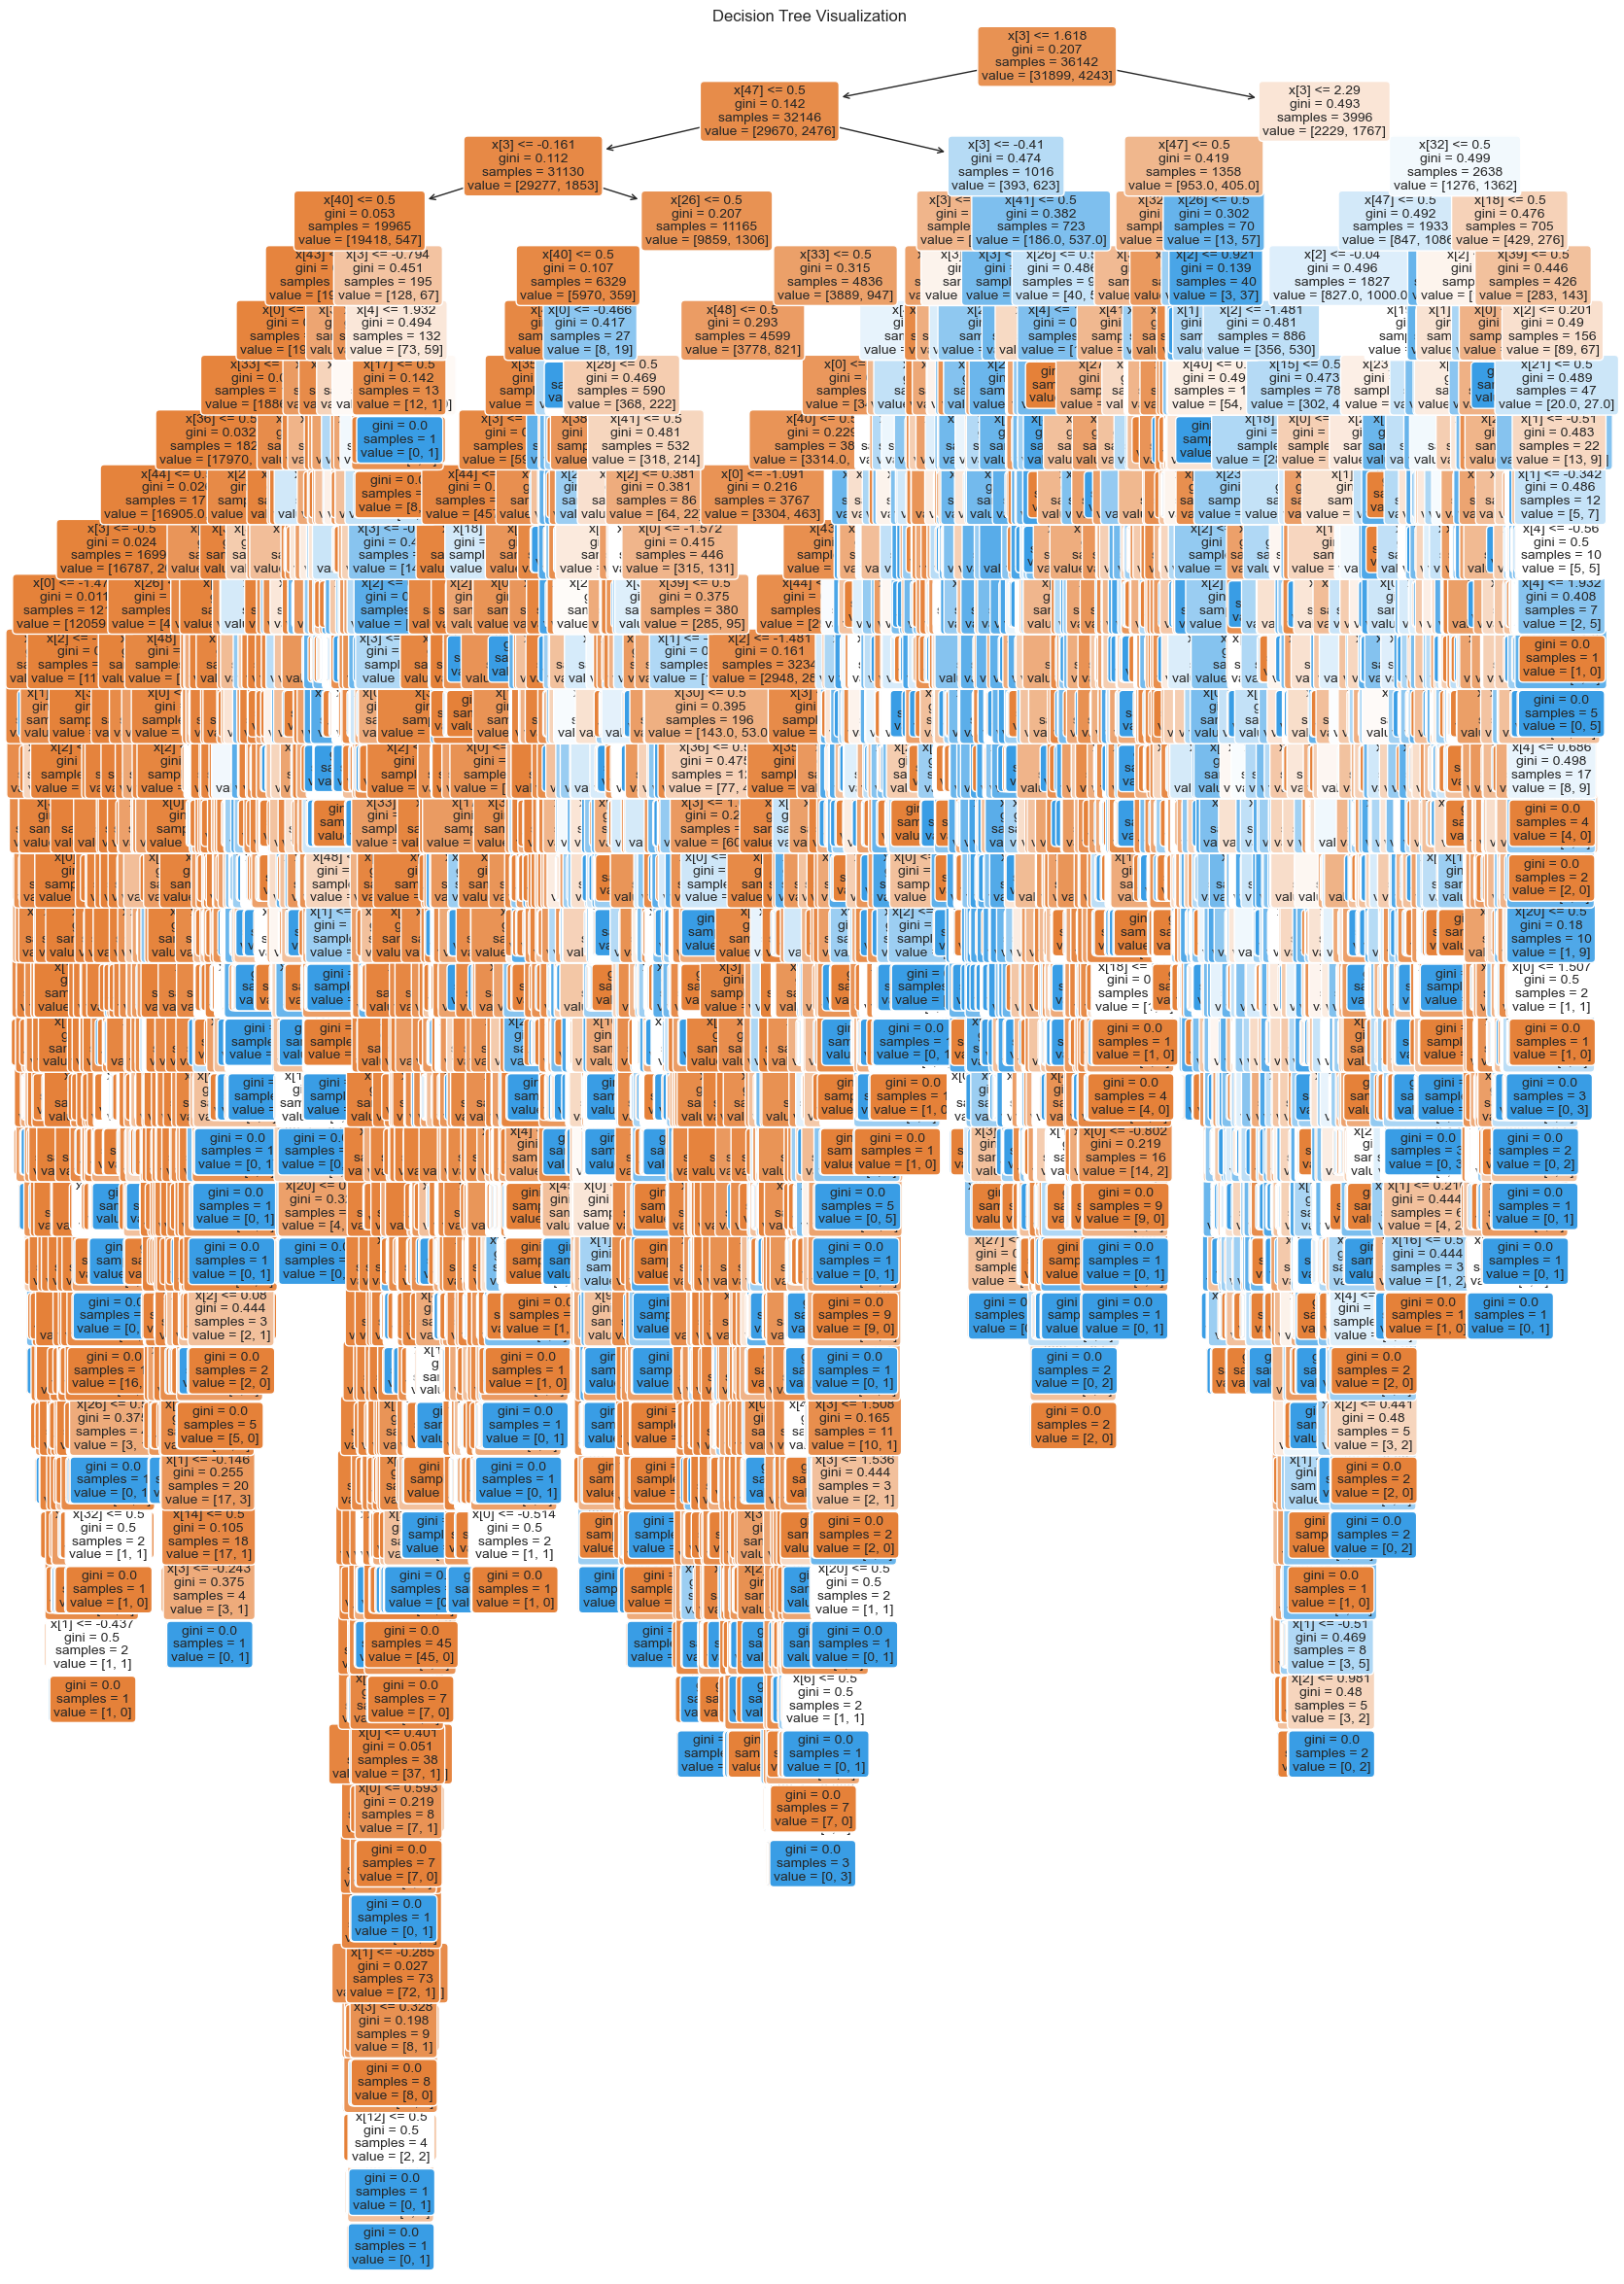

In [34]:

# Initialize Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Visualize the Decision Tree
plt.figure(figsize=(20, 30))
plot_tree(dtc.fit(X_train_preprocessed, y_train), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7990
           1       0.46      0.48      0.47      1046

    accuracy                           0.87      9036
   macro avg       0.69      0.70      0.70      9036
weighted avg       0.88      0.87      0.88      9036

Confusion Matrix:
 [[7403  587]
 [ 549  497]]
Decision Tree Performance: {'Train Accuracy': 1.0, 'Test Accuracy': 0.8742806551571491, 'Precision': 0.4584870848708487, 'Recall': 0.4751434034416826, 'F1 Score': 0.4666666666666667, 'Confusion Matrix': array([[7403,  587],
       [ 549,  497]], dtype=int64)}


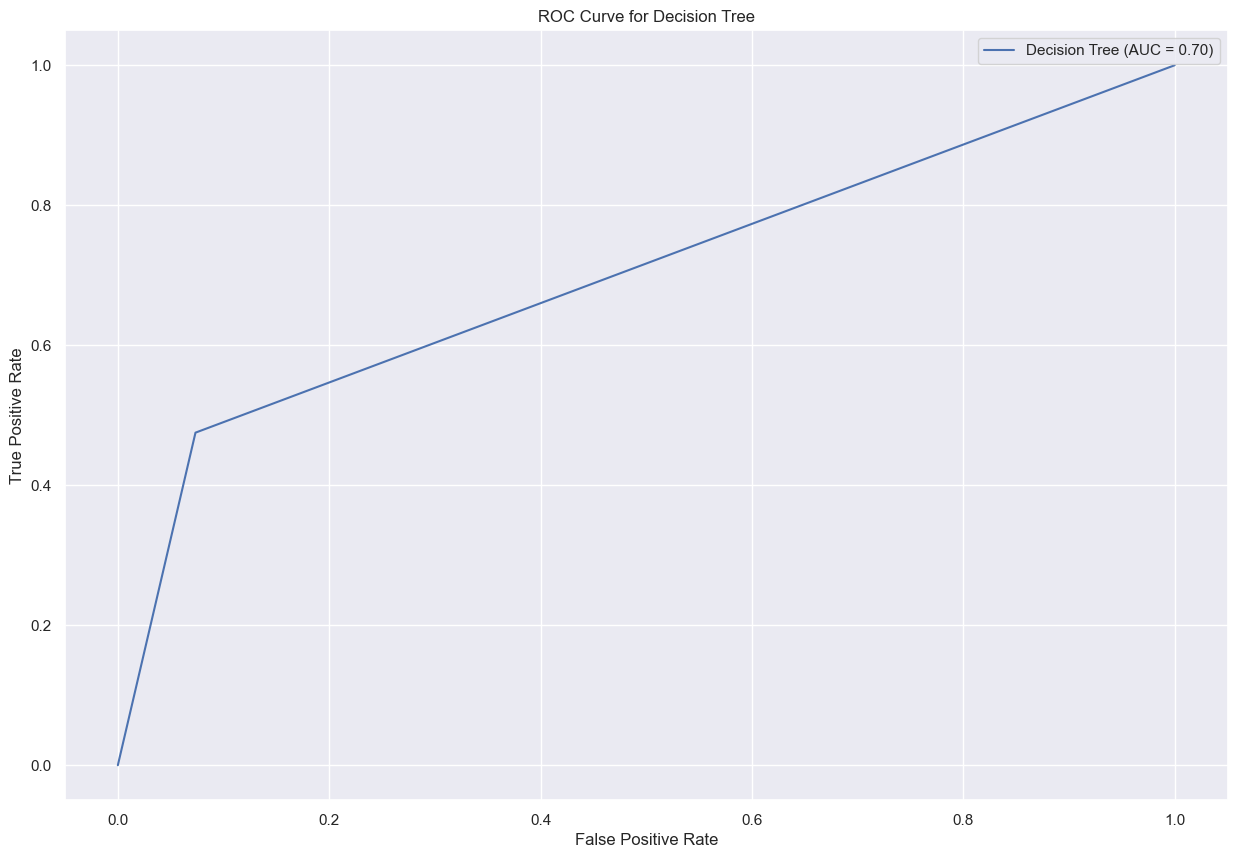

In [36]:
# Evaluate Decision Tree model
dtc_metrics = evaluate_decision_tree(dtc, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print("Decision Tree Performance:", dtc_metrics)

# Plot ROC curve for Decision Tree
plt.figure()
plot_roc_curve_decision_tree(dtc, X_test_preprocessed, y_test)


In [ ]:
###RandomForestClassifier

In [39]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Define a function to evaluate the Random Forest model and print metrics
def evaluate_random_forest(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train and test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Print classification report
    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test))
    
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    
    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary'),
        'Recall': recall_score(y_test, y_pred_test, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }
    
    # Print the evaluation metrics
    #for metric, value in metrics.items():
        #print(f'{metric}: {value}')

    return metrics

# Define a function to plot ROC curve for Random Forest
def plot_roc_curve_random_forest(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend()
    plt.show()



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7990
           1       0.63      0.41      0.50      1046

    accuracy                           0.90      9036
   macro avg       0.78      0.69      0.72      9036
weighted avg       0.89      0.90      0.90      9036

Confusion Matrix:
 [[7741  249]
 [ 614  432]]
Random Forest Performance: {'Train Accuracy': 1.0, 'Test Accuracy': 0.9044931385568836, 'Precision': 0.6343612334801763, 'Recall': 0.4130019120458891, 'F1 Score': 0.5002895193977996, 'Confusion Matrix': array([[7741,  249],
       [ 614,  432]], dtype=int64)}


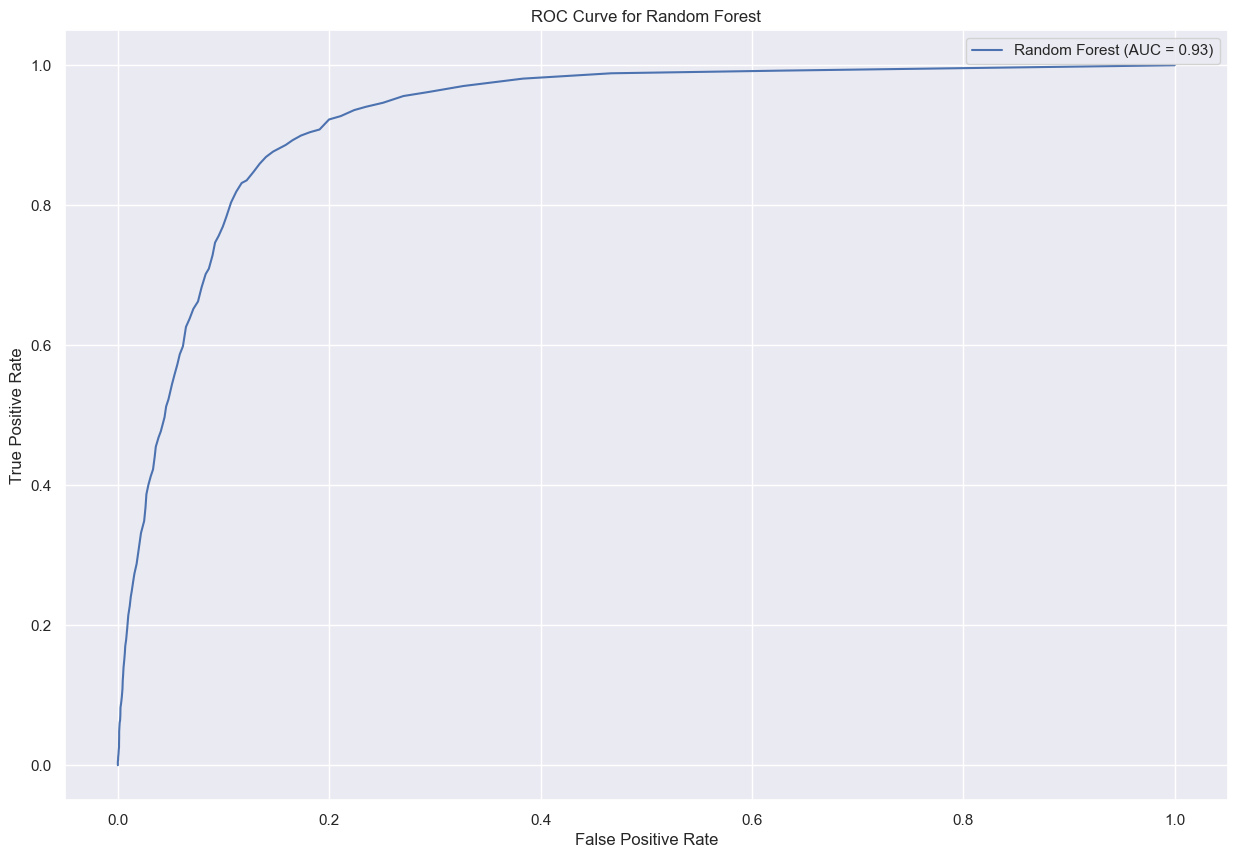

In [40]:
# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate Random Forest model
rfc_metrics = evaluate_random_forest(rfc, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print("Random Forest Performance:", rfc_metrics)

# Plot ROC curve for Random Forest
plt.figure()
plot_roc_curve_random_forest(rfc, X_test_preprocessed, y_test)


In [41]:
# 7. Optional Hyperparameter Tuning (using RandomizedSearchCV or GridSearchCV)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train)
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Define a function to evaluate the KNN model and print metrics
def evaluate_knn(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train and test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Print classification report
    print("KNN Classification Report:\n", classification_report(y_test, y_pred_test))
    
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    
    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary'),
        'Recall': recall_score(y_test, y_pred_test, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }
    
    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    return metrics

# Define a function to plot ROC curve for KNN
def plot_roc_curve_knn(model, X_test, y_test, label):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {label}')
    plt.legend()

# Test-driven evaluation function for KNN
def test_knn_model_evaluation():
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)

    # Evaluate the model
    metrics = evaluate_knn(knn, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
    
    # Test expected values (based on assumptions)
    assert metrics['Train Accuracy'] > 0.7, "Train Accuracy should be greater than 70%"
    assert metrics['Test Accuracy'] > 0.7, "Test Accuracy should be greater than 70%"
    assert metrics['Precision'] > 0.5, "Precision should be greater than 50%"
    assert metrics['Recall'] > 0.1, "Recall should be greater than 10%"
    
    print("KNN model test passed!")
    return metrics



KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7990
           1       0.60      0.34      0.44      1046

    accuracy                           0.90      9036
   macro avg       0.76      0.66      0.69      9036
weighted avg       0.88      0.90      0.88      9036

Confusion Matrix:
 [[7747  243]
 [ 687  359]]
Train Accuracy: 0.9200376293508937
Test Accuracy: 0.897078353253652
Precision: 0.5963455149501661
Recall: 0.34321223709369025
F1 Score: 0.4356796116504854
Confusion Matrix: [[7747  243]
 [ 687  359]]
KNN Performance: {'Train Accuracy': 0.9200376293508937, 'Test Accuracy': 0.897078353253652, 'Precision': 0.5963455149501661, 'Recall': 0.34321223709369025, 'F1 Score': 0.4356796116504854, 'Confusion Matrix': array([[7747,  243],
       [ 687,  359]], dtype=int64)}
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      79

NameError: name 'plot_roc_curve' is not defined

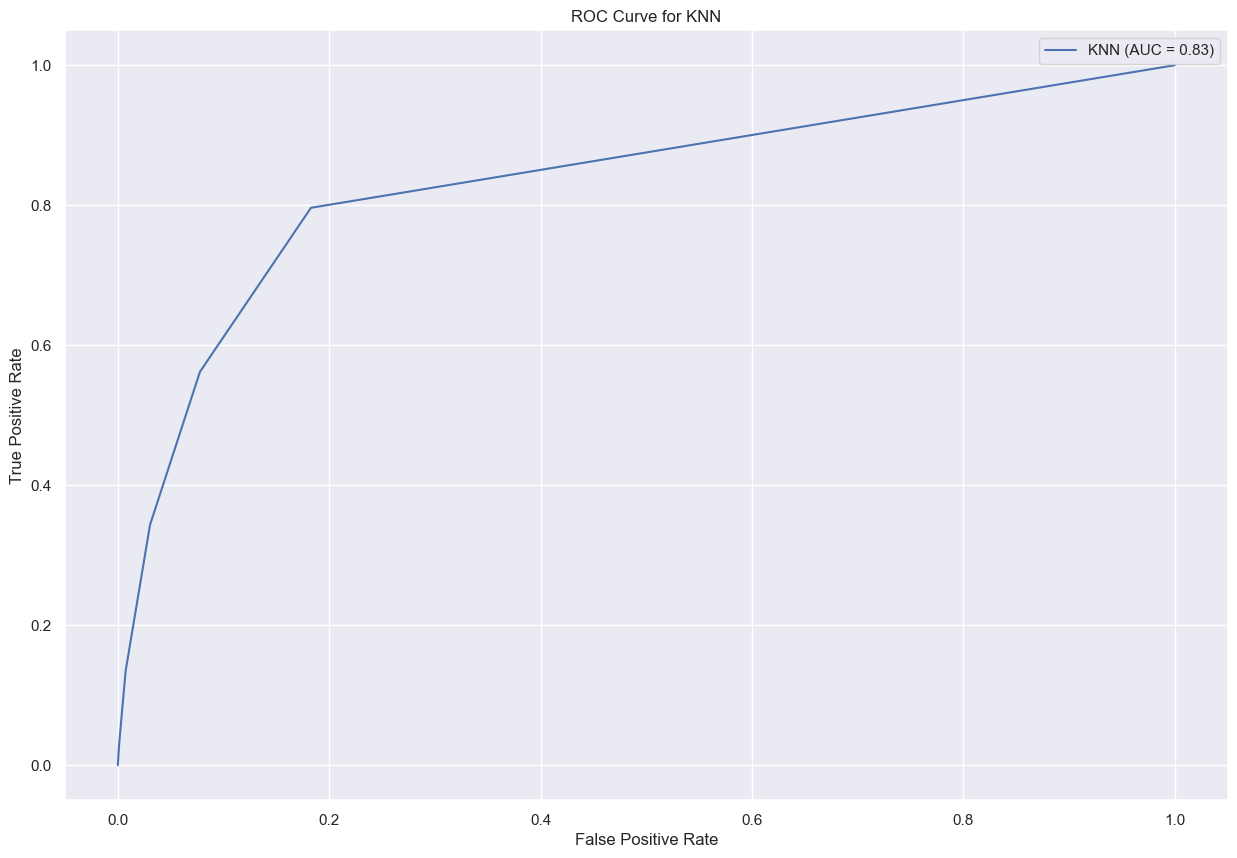

In [43]:
# 1. Instantiate KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train and evaluate KNN
knn_metrics = evaluate_knn(knn, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print("KNN Performance:", knn_metrics)

# 3. Test-driven evaluation of KNN model
test_knn_model_evaluation()

# 4. Plot ROC for KNN and compare with Decision Tree and Random Forest
plt.figure()
plot_roc_curve_knn(knn, X_test_preprocessed, y_test, 'KNN')
plot_roc_curve(dtc, X_test_preprocessed, y_test, 'Decision Tree')
plot_roc_curve(rfc, X_test_preprocessed, y_test, 'Random Forest')
plt.show()



In [ ]:
# 5. Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(X_train_preprocessed, y_train)

# Display the best parameters found through Grid Search
print("Best parameters found for KNN:", grid_search_knn.best_params_)


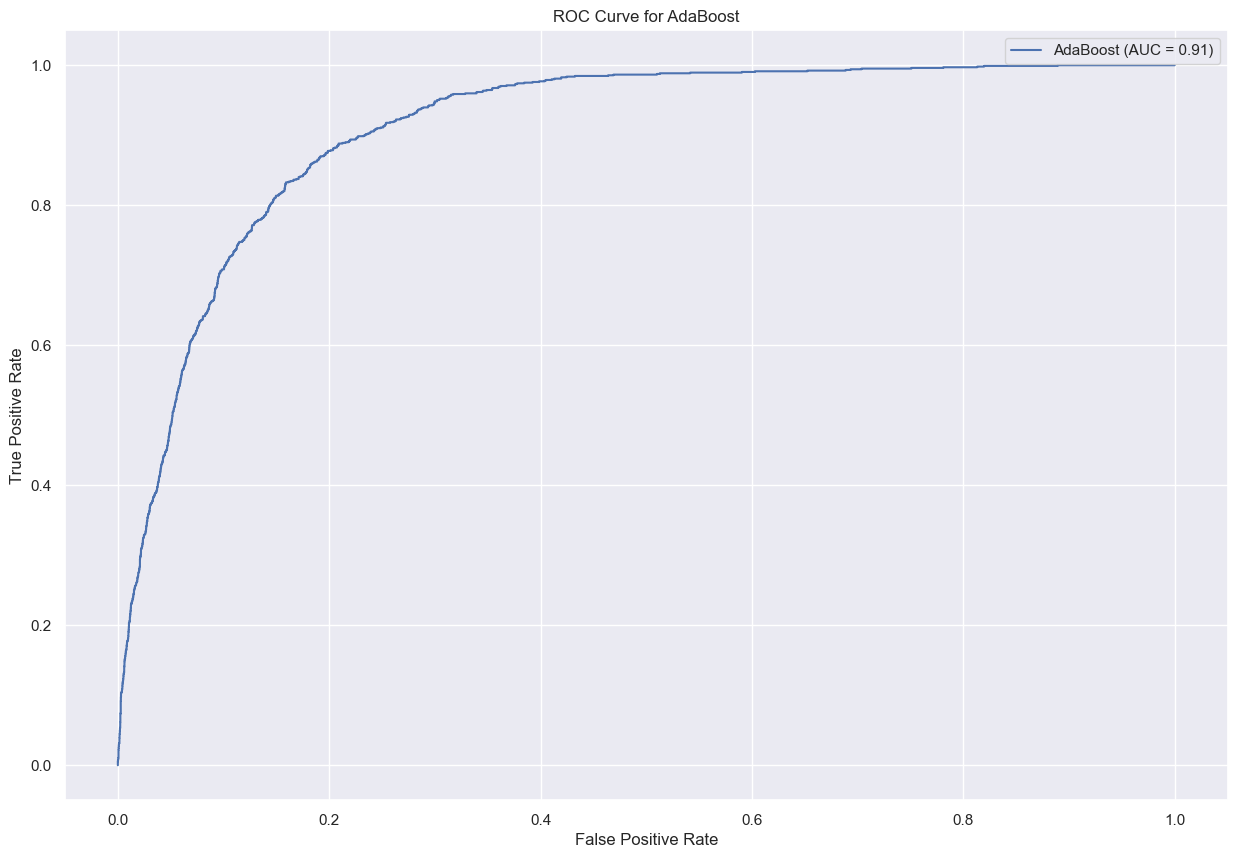

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      7990
           1       0.41      0.82      0.54      1046

    accuracy                           0.84      9036
   macro avg       0.69      0.83      0.72      9036
weighted avg       0.91      0.84      0.86      9036

Confusion Matrix:
 [[6740 1250]
 [ 189  857]]


In [44]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_sample_weight

# Compute class weights (useful when class imbalance exists)
class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize the AdaBoost classifier
adb = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model with sample weights
adb.fit(X_train_preprocessed, y_train, sample_weight=class_weights)

# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, label):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {label}')
    plt.legend()

# Create a new figure for the ROC curve
plt.figure()

# Plot ROC curve for AdaBoost model
plot_roc_curve(adb, X_test_preprocessed, y_test, 'AdaBoost')

# Display the plot
plt.show()

# Make predictions
y_pred = adb.predict(X_test_preprocessed)

# Print Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [86]:
y_pred_prob = adb.predict_proba(X_test_preprocessed)[:, 1]
print(y_pred_prob[:10])  # Print the first 10 predicted probabilities


[0.49604427 0.49265062 0.49111813 0.49150966 0.49203989 0.49347363
 0.49360128 0.49532057 0.49415174 0.49868004]


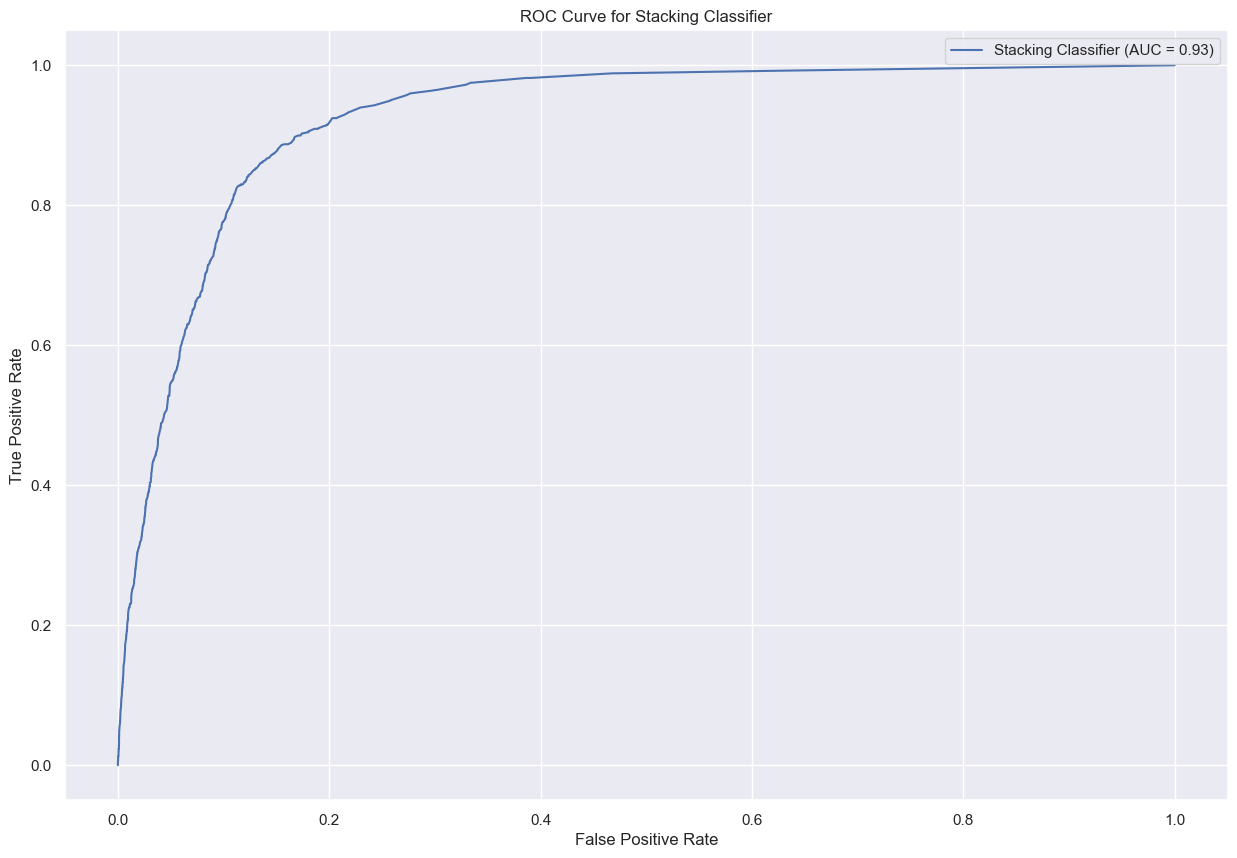

Accuracy: 0.90

Confusion Matrix:
[[7701  289]
 [ 578  468]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7990
           1       0.62      0.45      0.52      1046

    accuracy                           0.90      9036
   macro avg       0.77      0.71      0.73      9036
weighted avg       0.89      0.90      0.90      9036

F1 Score: 0.52
Precision: 0.62
Recall: 0.45


In [45]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Assume that dtc, knn, and rfc are already fitted models

# Initialize the meta-model (final classifier)
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier with pre-fitted models
stacking_clf = StackingClassifier(
    estimators=[
        ('decision_tree', dtc),
        ('knn', knn),
        ('random_forest', rfc)
    ],
    final_estimator=meta_model,
    cv=5  # Optional: You can specify cross-validation folds
)

# Fit the stacking classifier
# Even though the base models are fitted, the final estimator (meta-model) still needs fitting
stacking_clf.fit(X_train_preprocessed, y_train)

# Predict probabilities on the test set
y_pred_prob = stacking_clf.predict_proba(X_test_preprocessed)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Classifier (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()

# Predict labels on the test set
y_pred = stacking_clf.predict(X_test_preprocessed)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


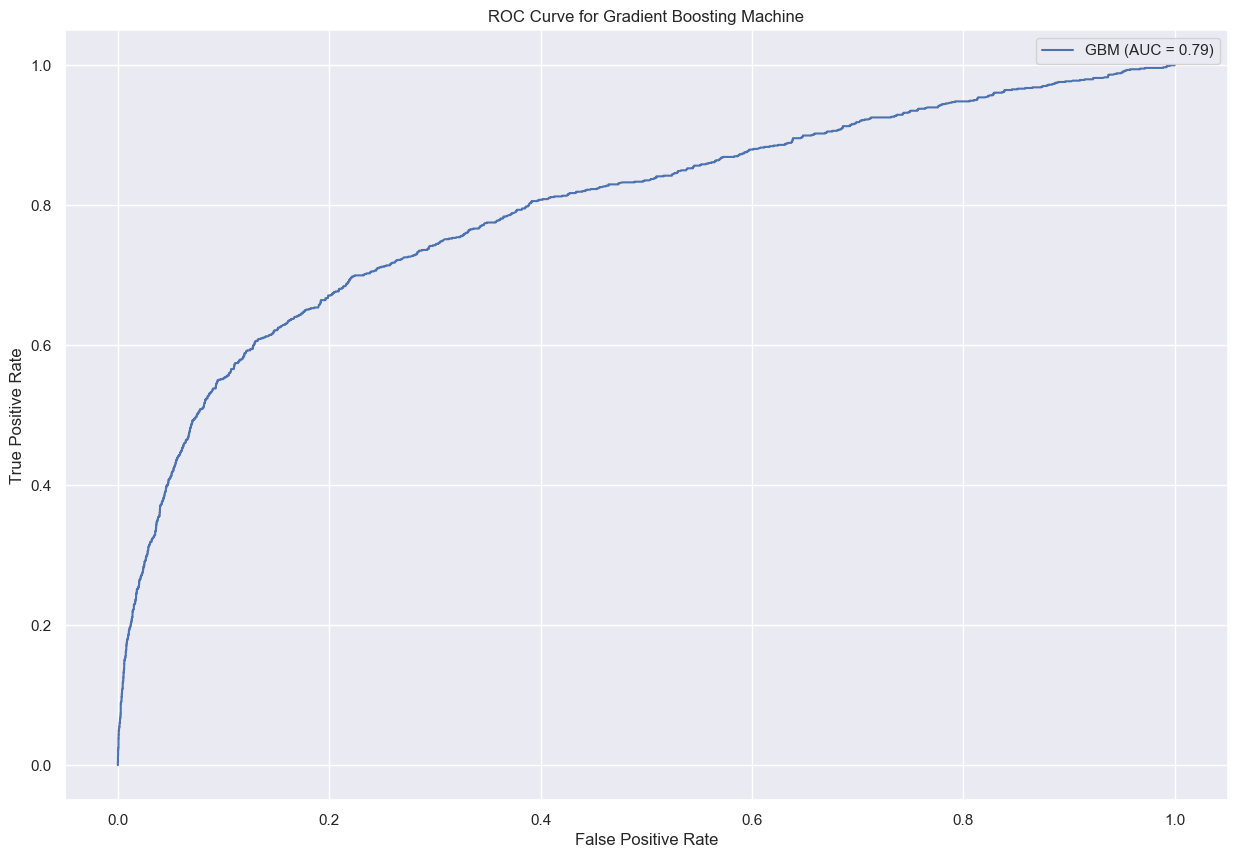

Accuracy: 0.90

Confusion Matrix:
[[7873  117]
 [ 813  233]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7990
           1       0.67      0.22      0.33      1046

    accuracy                           0.90      9036
   macro avg       0.79      0.60      0.64      9036
weighted avg       0.88      0.90      0.87      9036

F1 Score: 0.33
Precision: 0.67
Recall: 0.22


In [83]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbm.fit(X_train_preprocessed, y_train)

# Predict probabilities on the test set
y_pred_prob = gbm.predict_proba(X_test_preprocessed)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'GBM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Machine')
plt.legend()
plt.show()

# Predict labels on the test set
y_pred = gbm.predict(X_test_preprocessed)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


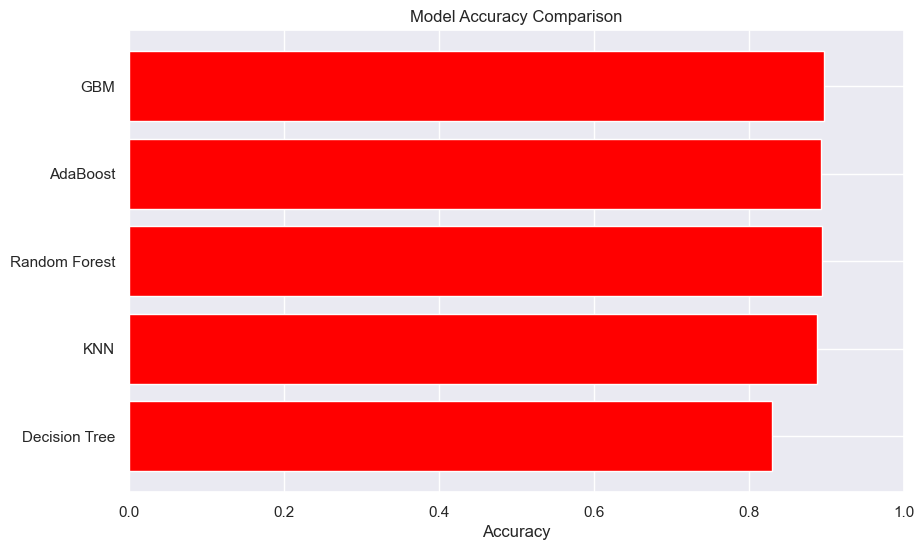

In [85]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Fit each model and calculate accuracy
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='red')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.show()


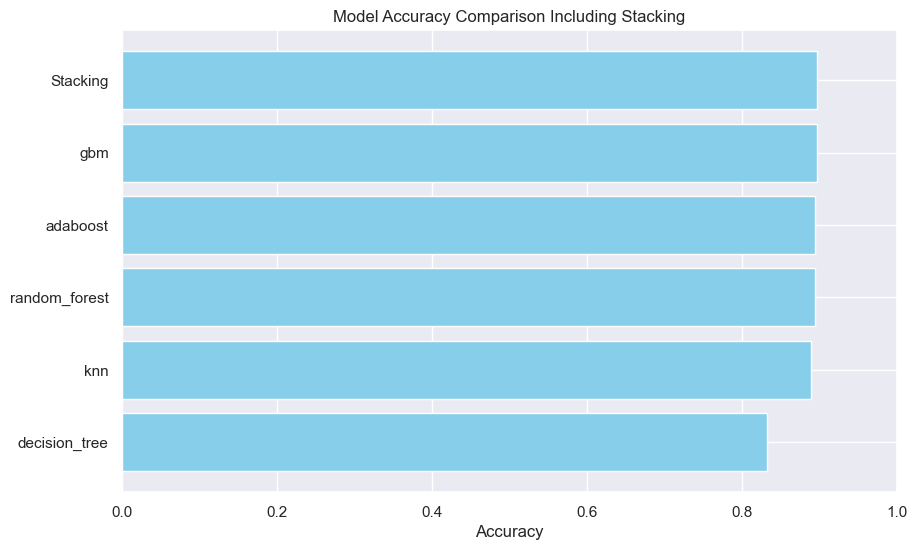

In [109]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize the models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Create a stacking classifier with a Logistic Regression meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Initialize a dictionary to store accuracy results
accuracy_results = {}

# Fit and evaluate base models
for name, model in base_models:
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Fit and evaluate the stacking model
stacking_model.fit(X_train_preprocessed, y_train)
y_pred_stacking = stacking_model.predict(X_test_preprocessed)
accuracy_results['Stacking'] = accuracy_score(y_test, y_pred_stacking)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison Including Stacking')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.show()

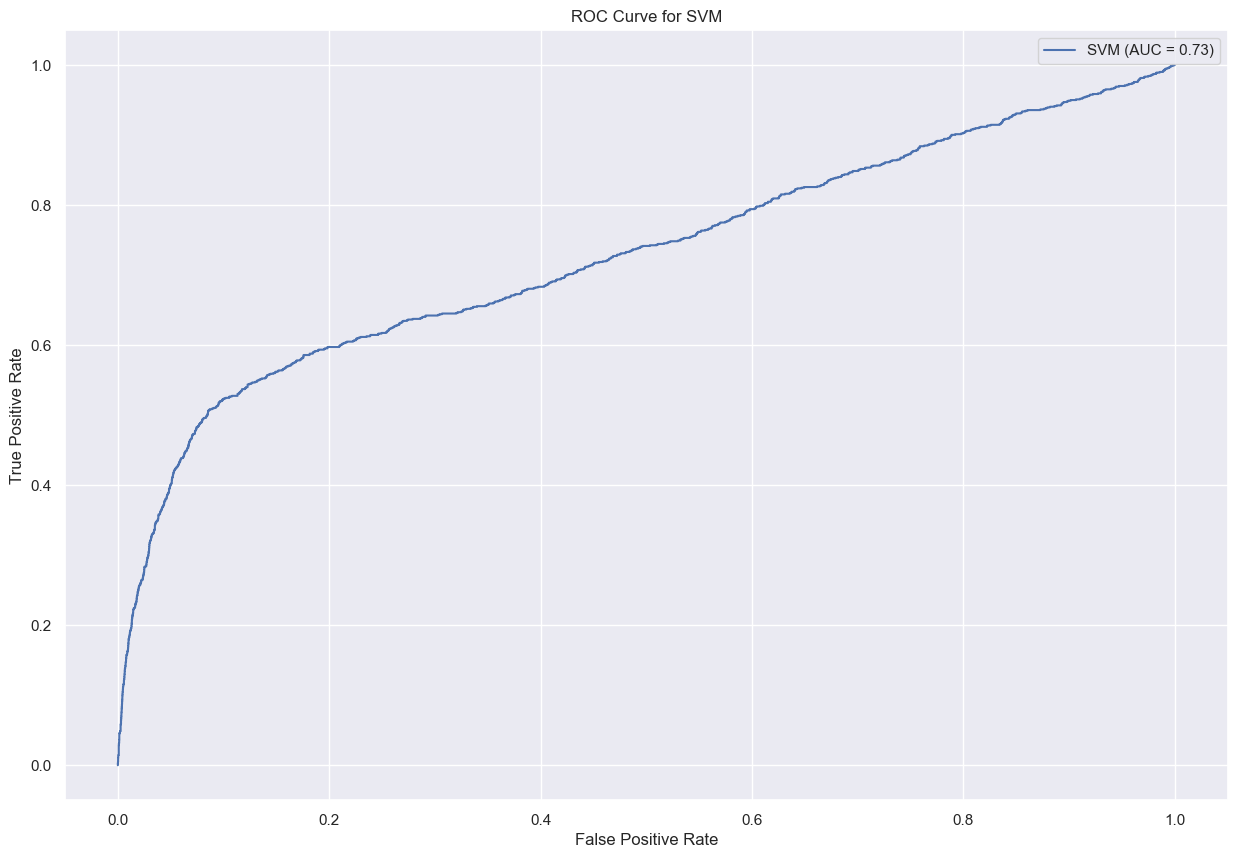

Accuracy: 0.90

Confusion Matrix:
[[7882  108]
 [ 827  219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7990
           1       0.67      0.21      0.32      1046

    accuracy                           0.90      9036
   macro avg       0.79      0.60      0.63      9036
weighted avg       0.88      0.90      0.87      9036

F1 Score: 0.32
Precision: 0.67
Recall: 0.21


In [87]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the Support Vector Machine classifier
svm_model = SVC(probability=True, random_state=42)  # Set probability=True to enable probability estimates

# Fit the model on the training data
svm_model.fit(X_train_preprocessed, y_train)

# Predict probabilities on the test set
y_pred_prob = svm_model.predict_proba(X_test_preprocessed)[:, 1]  # Probability for class 1

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

# Predict labels on the test set
y_pred = svm_model.predict(X_test_preprocessed)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


In [115]:
print(type(y_train), y_train.shape)


<class 'pandas.core.series.Series'> (31624,)


In [117]:
print(y_train.isnull().sum())  # If y_train is a pandas Series


0


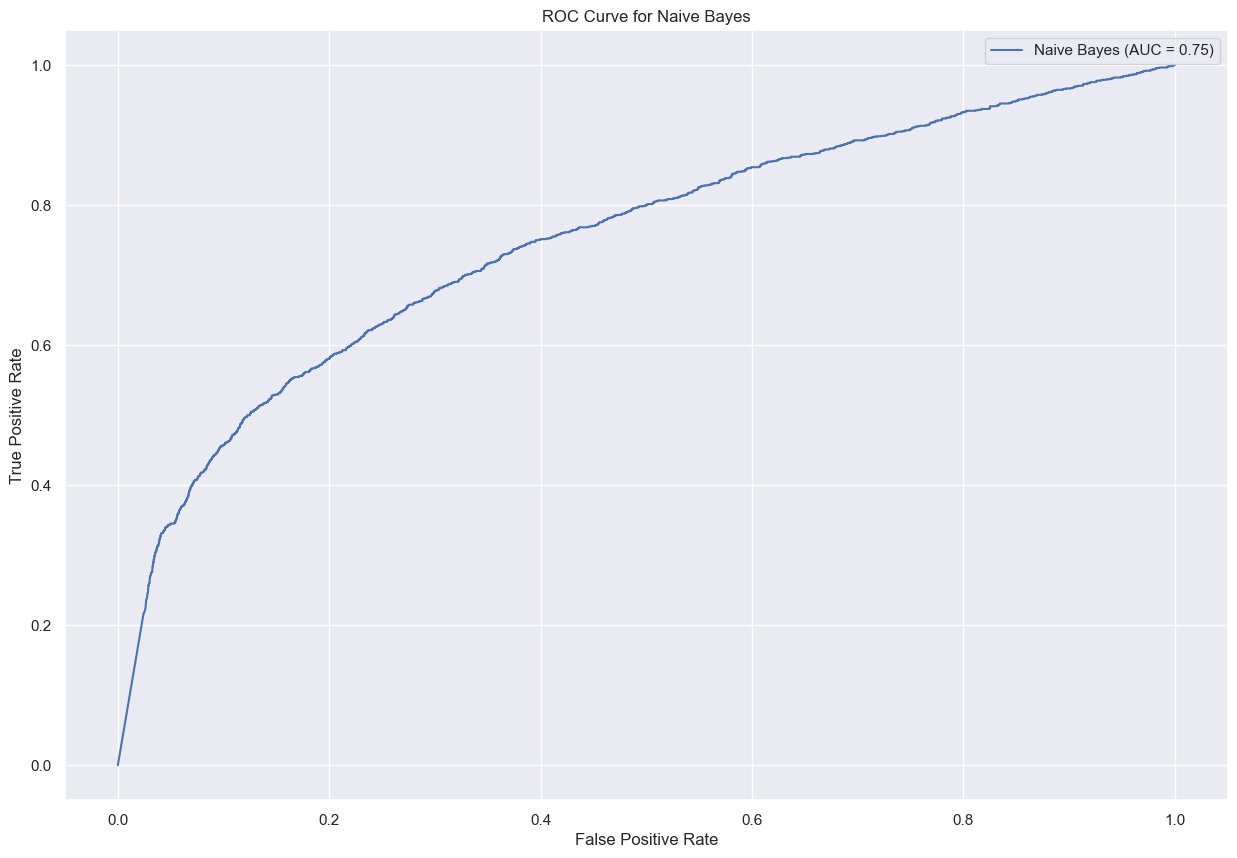

Accuracy: 0.86


In [121]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Convert sparse matrix to dense array if necessary
X_train_dense = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed
X_test_dense = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, 'toarray') else X_test_preprocessed

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_dense, y_train)

# Predict probabilities on the test set
y_pred_prob = nb_model.predict_proba(X_test_dense)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

# Print accuracy
y_pred = nb_model.predict(X_test_dense)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt



# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train_dense, y_train)

# Predict probabilities on the test set
y_pred_prob = log_reg.predict_proba(X_test_dense)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Print accuracy
y_pred = log_reg.predict(X_test_dense)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [173]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=100)),
    ('gbm', GradientBoostingClassifier(n_estimators=100)),
    ('svm', SVC(probability=True))  # SVC needs probability=True for predict_proba
]

# Initialize the stacking classifier with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5  # Cross-validation for the base models
)

# Convert sparse matrix to dense array if necessary
X_train_dense = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed
X_test_dense = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, 'toarray') else X_test_preprocessed

# Fit the stacking model
stacking_model.fit(X_train_dense, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test_dense)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking Model: {accuracy:.2f}')


Accuracy of Stacking Model: 0.90
